Predicting the Outcome of NHL Games

Preliminaty Setup:
Let's begin by exporting the data as well as fixing any issues such as renaming columns.

In [2]:
import os
import numpy as np  
import pandas as pd  

games_filename = ("nhl-202223-asplayed.csv")

In [3]:
results = pd.read_csv(games_filename)
results.head()

,Date,Start Time (Sask),Start Time (ET),Visitor,Score,Home,Score.1,Status
0,2022-10-07,12:00 PM,2:00 PM,San Jose Sharks,1,Nashville Predators,4,Regulation
1,2022-10-08,12:00 PM,2:00 PM,Nashville Predators,3,San Jose Sharks,2,Regulation
2,2022-10-11,5:30 PM,7:30 PM,Tampa Bay Lightning,1,New York Rangers,3,Regulation
3,2022-10-11,8:00 PM,10:00 PM,Vegas Golden Knights,4,Los Angeles Kings,3,Regulation
4,2022-10-12,5:00 PM,7:00 PM,Boston Bruins,5,Washington Capitals,2,Regulation


In [4]:
#Check if "date" column represents actual dates
results.dtypes.head(1)

Date    object
dtype: object

Pandas did not interpret the 'Date' column as actual dates, we will need to add an extra parameter in our "read_csv" function to fix this issue.

In [5]:
results = pd.read_csv(games_filename, parse_dates=["Date"])


In [6]:

# Delete the columns we do not need in our analysis
results = results.drop(results.columns[[1,2,7]], axis=1)
results

,Date,Visitor,Score,Home,Score.1
0,2022-10-07,San Jose Sharks,1,Nashville Predators,4
1,2022-10-08,Nashville Predators,3,San Jose Sharks,2
2,2022-10-11,Tampa Bay Lightning,1,New York Rangers,3
3,2022-10-11,Vegas Golden Knights,4,Los Angeles Kings,3
4,2022-10-12,Boston Bruins,5,Washington Capitals,2
...,...,...,...,...,...
1307,2023-04-13,Los Angeles Kings,5,Anaheim Ducks,3
1308,2023-04-13,Vancouver Canucks,5,Arizona Coyotes,4
1309,2023-04-13,Vegas Golden Knights,3,Seattle Kraken,1
1310,2023-04-14,Buffalo Sabres,5,Columbus Blue Jackets,2


In [7]:
# Fix the names of the columns
results.columns = ["Date", "Visitor Team", "Visitor Goals", "Home Team", "Home Goals"]
results

,Date,Visitor Team,Visitor Goals,Home Team,Home Goals
0,2022-10-07,San Jose Sharks,1,Nashville Predators,4
1,2022-10-08,Nashville Predators,3,San Jose Sharks,2
2,2022-10-11,Tampa Bay Lightning,1,New York Rangers,3
3,2022-10-11,Vegas Golden Knights,4,Los Angeles Kings,3
4,2022-10-12,Boston Bruins,5,Washington Capitals,2
...,...,...,...,...,...
1307,2023-04-13,Los Angeles Kings,5,Anaheim Ducks,3
1308,2023-04-13,Vancouver Canucks,5,Arizona Coyotes,4
1309,2023-04-13,Vegas Golden Knights,3,Seattle Kraken,1
1310,2023-04-14,Buffalo Sabres,5,Columbus Blue Jackets,2


Create the class to predict
We are trying to predict whether a certain team won their match. In our model, we will predict whether the Home Team won their match. Lets create the appropriate attribute:

In [8]:
# Create a new attribute called "HomeWin" to show which team won that game
results["HomeWin"] = results["Home Goals"] > results["Visitor Goals"]

# This will be the class we are trying to predict for our model, whether the home team won or not
y_true = results["HomeWin"].values
results


,Date,Visitor Team,Visitor Goals,Home Team,Home Goals,HomeWin
0,2022-10-07,San Jose Sharks,1,Nashville Predators,4,True
1,2022-10-08,Nashville Predators,3,San Jose Sharks,2,False
2,2022-10-11,Tampa Bay Lightning,1,New York Rangers,3,True
3,2022-10-11,Vegas Golden Knights,4,Los Angeles Kings,3,False
4,2022-10-12,Boston Bruins,5,Washington Capitals,2,False
...,...,...,...,...,...,...
1307,2023-04-13,Los Angeles Kings,5,Anaheim Ducks,3,False
1308,2023-04-13,Vancouver Canucks,5,Arizona Coyotes,4,False
1309,2023-04-13,Vegas Golden Knights,3,Seattle Kraken,1,False
1310,2023-04-14,Buffalo Sabres,5,Columbus Blue Jackets,2,False


Create the Performance Indicator
We will be using the F1 score as our main indicator of overall model performance. The F1 score is an overall measure of a test's accuracy which considers precision and recall in its formula as shown below:
F1 = 2 x ((precision x recall) / (precison + recall))


In [9]:
# We will use the classification report and the F1 score metric to show the performance of our model
from sklearn.metrics import f1_score, make_scorer, classification_report

# Let's designate a scorer object with the F1 score
scorer = make_scorer(f1_score, pos_label=None, average='weighted')

Creating a baseline to beat
In general, home teams win games more frequently - this is shown throughout many other sports as well.

We need our model to beat the default dataset we were given without any major changes. The performance for the dataset is as follows:

In [10]:
# Calculate the number of times home teams won in the dataset
n_games = results["HomeWin"].count()
n_homewins = results["HomeWin"].sum()
home_win_pct = n_homewins / n_games

print("Home win percentage:", home_win_pct)

Home win percentage: 0.5236280487804879


According to our model, the home team wins 52.36 % of the time

In [11]:
from sklearn.metrics import f1_score
y_pred = [1] * len(y_true)
print("F1 Score: {:.4f}".format(f1_score(y_true, y_pred, pos_label="None", average="weighted")))

F1 Score: 0.3599


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1549: UserWarning: Note that pos_label (set to 'None') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


As we can see, our F1 score is 0.3599. Therefore, we need to build a model with a better F1 score than 0.3599. 
Let's create more attributes to produce a better model. 

New feature: Momentum - Whether the home or visitor team won their last game
Let us create features that indicates whether each team won their last game, as momentum is an important factor to account for in sports games.

Let's see if this feature can improve our model.


In [12]:
# Create the new features with a default value of "False"
results["HomeLastWin"] = False
results["VisitorLastWin"] = False

In [13]:
from collections import defaultdict
won_last = defaultdict(int)

for index, row in results.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeLastWin"] = bool(won_last[home_team])
    row["VisitorLastWin"] = bool(won_last[visitor_team])
    results.loc[index] = row
    #Set which team won
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row["HomeWin"]

In [14]:
results.loc[20:25]

,Date,Visitor Team,Visitor Goals,Home Team,Home Goals,HomeWin,HomeLastWin,VisitorLastWin
20,2022-10-14,Tampa Bay Lightning,5,Columbus Blue Jackets,2,False,False,False
21,2022-10-14,Montreal Canadiens,0,Detroit Red Wings,3,True,False,True
22,2022-10-14,New York Rangers,1,Winnipeg Jets,4,True,False,True
23,2022-10-14,Carolina Hurricanes,2,San Jose Sharks,1,False,False,True
24,2022-10-15,Florida Panthers,4,Buffalo Sabres,3,False,True,True
25,2022-10-15,Vancouver Canucks,2,Philadelphia Flyers,3,True,True,False


Classification with Decision Trees
Lets use the Decision Tree Classifier as our model to predict which team won the game.

In [15]:
# Note: Cross validation score uses multiple folds
from sklearn.model_selection import cross_val_score

#Create new dataframe with just the necessary features
X_previousWins = results[["HomeLastWin", "VisitorLastWin"]].values

# The object, tree_clf, has the Decision Tree Classifier ready
from sklearn.tree import DecisionTreeClassifier

# random_state is for reproducibility 
tree_clf = DecisionTreeClassifier(random_state=10)

#Compute F1 Score
scores = cross_val_score(tree_clf, X_previousWins, y_true, scoring=scorer)
print("Using only our new attributes, whether each team won their last match, we get an F1 Score of:")
print("F1 Score: {0:.4f}".format(np.mean(scores)))


Using only our new attributes, whether each team won their last match, we get an F1 Score of:
F1 Score: 0.5331


With the momentum attribute, our F1 score significantly improves

In [16]:
df = pd.DataFrame(index = ['Baseline', "Last Win"], data=[(0.3599, 0), (0.5331, 0.5331-0.3599)], columns=["F1 Score", "Overall Performance Boost"])
df

,F1 Score,Overall Performance Boost
Baseline,0.3599,0.0000
Last Win,0.5331,0.1732


New Feature: Win Streaks
Similar to before, having a win streak can easily boost morale where a lose streak can cause problems within the team leading to poor performance for each successive game.

Can we improve our model by incorporating win streaks?

In [17]:
# Set our new features with a default value of 0
results["HomeWinStreak"] = 0
results["VisitorWinStreak"] = 0

from collections import defaultdict
win_streak = defaultdict(int)

for index, row in results.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["VisitorWinStreak"] = win_streak[visitor_team]
    results.loc[index] = row
    
    if row["HomeWin"]:
        win_streak[home_team] += 1  # if "HomeWin" is True, increase home_team by 1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1  # if "HomeWin" is True, increase home_team by 1
        
results.loc[100:105]

,Date,Visitor Team,Visitor Goals,Home Team,Home Goals,HomeWin,HomeLastWin,VisitorLastWin,HomeWinStreak,VisitorWinStreak
100,2022-10-25,New Jersey Devils,6,Detroit Red Wings,2,False,True,False,1,0
101,2022-10-25,Colorado Avalanche,3,New York Rangers,2,False,False,True,0,1
102,2022-10-25,Florida Panthers,2,Chicago Blackhawks,4,True,True,True,3,1
103,2022-10-25,Pittsburgh Penguins,1,Calgary Flames,4,True,True,False,1,0
104,2022-10-25,Buffalo Sabres,1,Seattle Kraken,5,True,False,True,0,3
105,2022-10-25,Tampa Bay Lightning,2,Los Angeles Kings,4,True,False,True,0,2


In [18]:
# Lets run the decision tree classifier again to see if the F1 Score has improved
tree_clf = DecisionTreeClassifier(random_state=10)
X_winstreak = results[["HomeLastWin", "VisitorLastWin", "HomeWinStreak", "VisitorWinStreak"]].values
scores = cross_val_score(tree_clf, X_winstreak, y_true, scoring = scorer)
print("By adding win streaks, our new F1 score is:")
print("F1 Score: {0:.4f}".format(np.mean(scores)))

By adding win streaks, our new F1 score is:
F1 Score: 0.5209


Surprisingly, our F1 Score actually decreased. 
Note: The Overall Performance Boost for "Last Win" is the difference between "Last Win" and "Baseline" whereas the Overall Performance Boost for successive tests is a comparison with "Last Win" and not Baseline.

In [19]:
df2 = pd.DataFrame(index = ["Win Streaks & Last Win"], data=[(0.5209, 0.5209 - 0.5331)], columns=["F1 Score", "Overall Performance Boost"])
df = pd.concat([df, df2], ignore_index=True)
df.index = ['Baseline', "Last Win", "Win Streaks & Last Win"]
df

,F1 Score,Overall Performance Boost
Baseline,0.3599,0.0000
Last Win,0.5331,0.1732
Win Streaks & Last Win,0.5209,-0.0122


So far, all our features have been based on the same dataset. The more we build on the same dataset, the more we risk overfitting our data and not being able to predict instances when using unseen or new data

One dataset we can consider is the standings of all the teams from the previous year.


Avoiding Overfitting: Team Rankings from the previous Season
If a team placed high last season, their momentum/ spirit is most likely to be very high. Imagine a team that was essentially in last place that lost every game and was put up against the team that had won last season in a landslide, would the losing team be nervous about their upcoming game? This information could potentially be a strong indicator in determining the outcome of a game.

Let us create a new feature that checks whether the home team was ranked higher than the visitor team from the last season.

In [20]:
#Import data

ladders_filename = ("nhl_standings.csv")
ladder = pd.read_csv(ladders_filename)
ladder

,Rk,Team,Overall,Shootout,Overtime,Home,Road,EAS,WES,ATL,...,PAC,≤1,≥3,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Boston Bruins,65-12-5,4-3,7-2,34-4-3,31-8-2,40-7-3,25-5-2,18-5-3,...,12-2-2,23-6-5,24-4-0,8-1-0,11-2-0,9-1-4,10-3-1,9-1-0,11-4-0,7-0-0
1,2,Carolina Hurricanes,52-21-9,4-3,9-6,28-10-3,24-11-6,34-13-3,18-8-6,15-7-2,...,9-4-3,25-6-9,21-10-0,6-2-1,6-4-4,12-0-1,9-3-2,6-2-0,8-7-1,5-3-0
2,3,New Jersey Devils,52-22-8,2-4,11-4,24-13-4,28-9-4,30-17-3,22-5-5,12-11-1,...,14-0-2,20-6-8,20-9-0,6-3-0,13-1-0,4-7-2,9-2-2,7-2-1,8-5-3,5-2-0
3,4,Vegas Golden Knights,51-22-9,5-4,8-5,25-15-1,26-7-8,22-8-2,29-14-7,12-4-0,...,14-9-3,25-8-9,19-11-0,8-2-0,9-4-1,8-6-1,4-6-2,6-1-2,11-3-1,5-0-2
4,5,Toronto Maple Leafs,50-21-11,1-2,7-9,27-8-6,23-13-5,31-13-6,19-8-5,15-7-4,...,8-5-3,21-4-11,25-10-0,4-4-2,11-1-3,8-3-1,8-4-2,6-3-0,7-5-2,6-1-1
5,6,Colorado Avalanche,51-24-7,6-3,9-4,22-13-6,29-11-1,18-11-3,33-13-4,9-6-1,...,14-7-3,22-8-7,22-9-0,4-4-1,8-3-0,7-6-2,8-5-0,7-1-2,10-5-1,7-0-1
6,7,Edmonton Oilers,50-23-9,0-4,5-5,23-12-6,27-11-3,17-11-4,33-12-5,11-4-1,...,19-6-1,15-9-9,22-9-0,6-3-0,7-7-0,7-6-2,8-2-2,4-3-4,12-2-1,6-0-0
7,8,Dallas Stars,47-21-14,4-3,4-11,22-10-9,25-11-5,17-7-8,30-14-6,8-4-4,...,12-10-2,13-6-14,29-9-0,5-3-1,8-3-3,10-3-2,5-4-4,3-3-3,10-4-1,6-1-0
8,9,New York Rangers,47-22-13,4-3,6-10,23-13-5,24-9-8,26-16-8,21-6-5,11-7-6,...,11-2-3,15-9-13,19-9-0,5-3-2,6-6-2,8-3-2,8-2-2,7-3-1,10-4-2,3-1-2
9,10,Los Angeles Kings,47-25-10,6-3,4-7,26-11-4,21-14-6,17-11-4,30-14-6,11-4-1,...,15-8-3,21-6-10,16-12-0,6-5-0,6-4-4,9-4-2,7-5-1,6-2-1,9-2-2,4-3-0


In [21]:
ladder["Team"] = ladder["Team"].astype(str) # Convert teams to type str

In [22]:
# Create our new feature - HomeTeamRanksHigher
def home_team_ranks_higher(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    
    home_rank = ladder.loc[ladder['Team'] == home_team, "Rk"].values[0]
    visitor_rank = ladder.loc[ladder['Team'] == visitor_team, "Rk"].values[0]
    return home_rank < visitor_rank # Remember, a higher ranking is a lower number (in other words, 1st place > 2nd place)

results["HomeTeamRanksHigher"] = results.apply(home_team_ranks_higher, axis=1)
results[['Date', 'Visitor Team', 'Visitor Goals', 'Home Team', 'Home Goals', 'HomeWin', 'HomeTeamRanksHigher']]

,Date,Visitor Team,Visitor Goals,Home Team,Home Goals,HomeWin,HomeTeamRanksHigher
0,2022-10-07,San Jose Sharks,1,Nashville Predators,4,True,True
1,2022-10-08,Nashville Predators,3,San Jose Sharks,2,False,False
2,2022-10-11,Tampa Bay Lightning,1,New York Rangers,3,True,True
3,2022-10-11,Vegas Golden Knights,4,Los Angeles Kings,3,False,False
4,2022-10-12,Boston Bruins,5,Washington Capitals,2,False,False
...,...,...,...,...,...,...,...
1307,2023-04-13,Los Angeles Kings,5,Anaheim Ducks,3,False,False
1308,2023-04-13,Vancouver Canucks,5,Arizona Coyotes,4,False,False
1309,2023-04-13,Vegas Golden Knights,3,Seattle Kraken,1,False,False
1310,2023-04-14,Buffalo Sabres,5,Columbus Blue Jackets,2,False,False


In [23]:
# Lets build our Decision Tree Classifier to see if there are any improvements
X_homehigher = results[["HomeLastWin", "VisitorLastWin", "HomeTeamRanksHigher"]].values

tree_clf = DecisionTreeClassifier(random_state = 10)
scores = cross_val_score(tree_clf, X_homehigher, y_true, scoring = scorer)
print("By considering last seasons' rankings, the new F1 score is:")
print("F1: {0:.4f}".format(np.mean(scores)))

By considering last seasons' rankings, the new F1 score is:
F1: 0.6312


When compared to win streaks, a teams' ranking from last season provides a much larger boost in performance.

In [24]:
df2 = pd.DataFrame(index=["Team Rankings & Last Win"], data = [(0.6312, 0.6312 - 0.5331)], columns = ['F1 Score', 'Overall Performance Boost'])
df = pd.concat([df, df2], ignore_index=True)
df.index = ['Baseline', "Last Win", "Win Streaks & Last Win", "Team Rankings & Last Win"]
df

,F1 Score,Overall Performance Boost
Baseline,0.3599,0.0000
Last Win,0.5331,0.1732
Win Streaks & Last Win,0.5209,-0.0122
Team Rankings & Last Win,0.6312,0.0981


Moving away from default parameters

So far we've been using the default parameters when using DecisionTreeClassifier. Could we potentially find a better model if we tweak the parameters?
GridSearchCV is a great function in Scikit-Learn that allows you to quickly try many different combinations

In [25]:
from sklearn.model_selection import GridSearchCV

parameter_space = {"max_depth": list(range(1, 21))}

tree_clf = DecisionTreeClassifier(random_state=10)
grid = GridSearchCV(tree_clf, parameter_space, scoring = scorer)
grid.fit(X_homehigher, y_true)
print("F1 Score: {0:.4f}".format(grid.best_score_))

F1 Score: 0.6312


There seems to be a parameter setting that is at least as good than the default! We will use GridSearchCV again later on down to find our best model once we have defined all our features.

New Feature: Did the home team win against the visiting team last game?
Our previous feature, LastWin, only looked at the teams' literal last game they played (so the previous opponent would have been different from the current visiting team)
This feature looks at if the home team won the LAST head to head matchup against the current visiting team

In [26]:
last_match_winner = defaultdict(int)

def home_team_won_last(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    
    # Sort team names for a consistent ordering (sorts by alphabetical order)
    teams = tuple(sorted([home_team, visitor_team]))
    
    # If the home team won the previous game, the "result" will be 1
    if last_match_winner[teams] == row["Home Team"]:
        result = 1
    else:
        result = 0
      
        
    # Update record for next encounter
    winner = row["Home Team"] if row["HomeWin"] else row["Visitor Team"]

    last_match_winner[teams] = winner
    return result

results["HomeTeamWonLast"] = results.apply(home_team_won_last, axis=1)
results[['Date', 'Visitor Team', 'Visitor Goals', 'Home Team', 'Home Goals', 'HomeWin', 'HomeTeamWonLast']]
 


,Date,Visitor Team,Visitor Goals,Home Team,Home Goals,HomeWin,HomeTeamWonLast
0,2022-10-07,San Jose Sharks,1,Nashville Predators,4,True,0
1,2022-10-08,Nashville Predators,3,San Jose Sharks,2,False,0
2,2022-10-11,Tampa Bay Lightning,1,New York Rangers,3,True,0
3,2022-10-11,Vegas Golden Knights,4,Los Angeles Kings,3,False,0
4,2022-10-12,Boston Bruins,5,Washington Capitals,2,False,0
...,...,...,...,...,...,...,...
1307,2023-04-13,Los Angeles Kings,5,Anaheim Ducks,3,False,0
1308,2023-04-13,Vancouver Canucks,5,Arizona Coyotes,4,False,1
1309,2023-04-13,Vegas Golden Knights,3,Seattle Kraken,1,False,0
1310,2023-04-14,Buffalo Sabres,5,Columbus Blue Jackets,2,False,1


In [27]:
# Let us calculate the F1 Score now
X_last_win = results[["HomeLastWin", "VisitorLastWin", "HomeTeamRanksHigher", "HomeTeamWonLast"]].values

tree_clf = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(tree_clf, X_last_win, y_true, scoring=scorer)
print("By considering if the home team won against the visiting team last game, we get a new F1 score of:")
print("F1 Score: {0:.4f}".format(np.mean(scores)))

By considering if the home team won against the visiting team last game, we get a new F1 score of:
F1 Score: 0.6112


The performance fell as compared to our previous model however the fall in performance is very small. This could be potentially due to noise or other randomness factors.

In [28]:
df2 = pd.DataFrame(index=["Won Last, Team Rankings & Last Win"], data=[(0.6112, 0.6112-0.5331)], columns = ["F1 Score", "Overall Performance Boost"])
df = pd.concat([df, df2], ignore_index=True)
df.index = ['Baseline', "Last Win", "Win Streaks & Last Win", "Team Rankings & Last Win", "Won Last, Team Rankings, & Last Win"]
df

,F1 Score,Overall Performance Boost
Baseline,0.3599,0.0000
Last Win,0.5331,0.1732
Win Streaks & Last Win,0.5209,-0.0122
Team Rankings & Last Win,0.6312,0.0981
"Won Last, Team Rankings, & Last Win",0.6112,0.0781


Summary of Features and their Performance

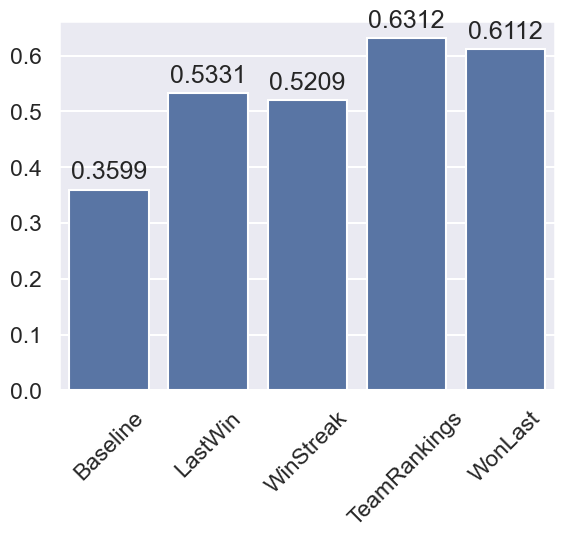

In [29]:
# Let's visually summarize our performance
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.axes_divider

labels = ["Baseline", "LastWin", "WinStreak", "TeamRankings", "WonLast"]
scores = [0.3599, 0.5331, 0.5209, 0.6312, 0.6112]

sns.set(style="darkgrid", context="talk")
ax = sns.barplot(x=labels, y=scores)

for i, score in enumerate(scores):
    ax.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom')


plt.xticks(rotation=45)
plt.show()

By adding new features, we see improvements in our model however by continuously adding features that were derived from the same dataset, our performance improvements were marginally less from each successive addition

By adding a feature outside of our original dataset, that is "Rankings", we saw a noticable performance boost
Adding our final feature "WonLast" provided negligible improvements


Encoding

One of the most important pieces of information in our dataset we have been ignoring up till now is the actual team themselves
Currently, the team names are stored as strings (e.g. "Calgary Flames" or "Boston Bruins") and classification methods don't work too well with these
By utilizing the 'one hot encoder' feature provided by Scikit-Learn, we can label the team names in a numeric fashion so that our classifier can understand them and potentially provide much more information to our model in determining winners
What will happen is we will be creating a feature that will ask a question:

Was this team the Calgary Flames?
And the answer will result in values like:

1 (for yes) and 0 (for no)

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()  # encoding object has LabelEncoder ready to use
encoding.fit(results["Home Team"].values) # give each team a number to identify them by

LabelEncoder()

In [31]:
home_teams = encoding.transform(results["Home Team"].values)
visitor_teams = encoding.transform(results["Visitor Team"].values)

# vstack allows you to stack a sequence of arrays vertically - in this case we do it to make easy comparisons
X_teams = np.vstack([home_teams, visitor_teams]).T #Transpose
X_teams, X_teams.shape

(array([[16, 23],
        [23, 16],
        [19, 26],
        ...,
        [24, 29],
        [ 8,  3],
        [16,  7]]),
 (1312, 2))

In [32]:
results["Home Team"].values

array(['Nashville Predators', 'San Jose Sharks', 'New York Rangers', ...,
       'Seattle Kraken', 'Columbus Blue Jackets', 'Nashville Predators'],
      dtype=object)

In [33]:
results["Visitor Team"].values

array(['San Jose Sharks', 'Nashville Predators', 'Tampa Bay Lightning',
       ..., 'Vegas Golden Knights', 'Buffalo Sabres',
       'Colorado Avalanche'], dtype=object)

In [34]:
# Prepare the One Hot Encoder
onehot = OneHotEncoder()
X_teams = onehot.fit_transform(X_teams).todense() #todense returns a matrix
X_teams.shape

(1312, 64)

In [35]:
print("Home:", X_teams[0, :32])
print("Visitor:", X_teams[0, :32])

Home: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
Visitor: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


Above is large matrix (with dimensions 1312 x 64) that has the list of team names and will mark as "1" if the team name is found within it.

By doing this, our model can now understand team names when doing its calculations.

In [44]:
# Lets build our model using the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(tree_clf, np.asarray(X_teams), y_true, scoring=scorer)

#Note: The only feature is the encoder we just made
print("The F1 score using encoded teams is the following: {0:.4f}".format(np.mean(scores)))

The F1 score using encoded teams is the following: 0.5783


In [36]:
df

,F1 Score,Overall Performance Boost
Baseline,0.3599,0.0000
Last Win,0.5331,0.1732
Win Streaks & Last Win,0.5209,-0.0122
Team Rankings & Last Win,0.6312,0.0981
"Won Last, Team Rankings, & Last Win",0.6112,0.0781


Random Forest Classifier
Up to now we've been using only the Decision Tree Classifier as our tool to building our model. Could we potentially produce a better model if we were to use a Random Forest Classifier?

In [37]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X_teams_array = np.asarray(X_teams)

forest_clf = RandomForestClassifier(random_state=10)
scores = cross_val_score(forest_clf, X_teams_array, y_true, scoring=scorer)
print("The F1 score using Random Forest Classifier is the following: {0:.4f}".format(np.mean(scores)))

The F1 score using Random Forest Classifier is the following: 0.5821


There was a drop in performance (as compared to our "Team Rankings & Last Win" model) which could potentially be explained by overfitting or other randomness factors

Could we do better moving away from the default values using GridSearchCV with Random Forest Classifier?

GridSearchCV with Random Forest Classifier

In [38]:
#Will take some time to run

parameter_space = {
    "max_features": [2, 10, 50, 'sqrt', 'log2', None],
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 2, 4, 6]
}

forest_clf = RandomForestClassifier(random_state=10)
grid = GridSearchCV(forest_clf, parameter_space, scoring =scorer)
grid.fit(np.asarray(X_teams), y_true)

#View results
print("F1: {0:.4f}".format(grid.best_score_))
print(grid.best_estimator_)


F1: 0.6307
RandomForestClassifier(max_features=10, min_samples_leaf=6, random_state=10)


Our best result was an F1 score of 0.5840 with the following parameters:

Max_features = 10
n_estimators = 100 (the number of tress in the forest)
Criterion = entropy (information gain/ certainty)
min_samples_leaf = 6 (minimum number of samples in a leaf; a split is discarded if after a split, at least one of the leaves contains less than "min_samples_leaf" samples)

Combine Encoded attribute with Previous Attributes
Let us combine our previous attributes and our new encoded attribute to see the overall performance change:

In [39]:
X_all = np.hstack([X_last_win, X_teams])
print(X_all.shape)

(1312, 68)


In [40]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(tree_clf, np.asarray(X_all), y_true, scoring = scorer)
print("F1 score: {0:.4f}".format(np.mean(scores)))


F1 score: 0.5562


In [41]:
#Random Forest Classifier
parameter_space = {
    "max_features": [2, 10, 50, 'sqrt', 'log2', None],
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 2, 4, 6]
}

forest_clf = RandomForestClassifier(random_state=10)
grid = GridSearchCV(forest_clf, parameter_space, scoring =scorer)
grid.fit(np.asarray(X_teams), y_true)

#View results
print("F1: {0:.4f}".format(grid.best_score_))
print(grid.best_estimator_)


F1: 0.6307
RandomForestClassifier(max_features=10, min_samples_leaf=6, random_state=10)


Final Results
Let us take a look at our previous and final results

Note:

DT = Decision Tree
RF = Random Forest

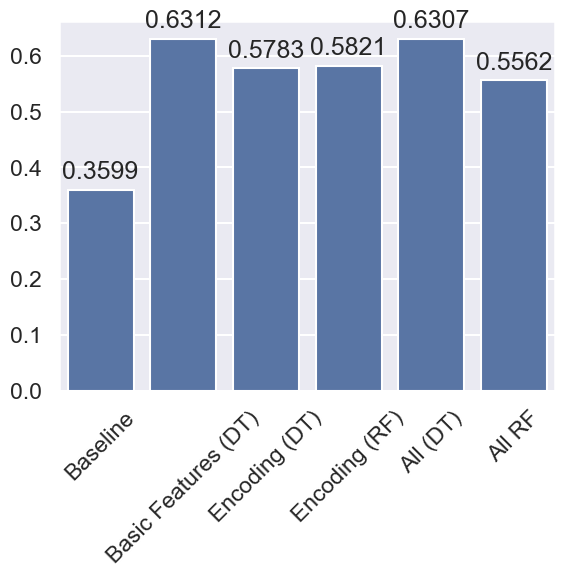

In [45]:
labels = ["Baseline", "Basic Features (DT)", "Encoding (DT)", "Encoding (RF)", "All (DT)", "All RF"]
scores = [0.3599, 0.6312, 0.5783, 0.5821, 0.6307, 0.5562]

sns.set(style="darkgrid", context="talk")
ax = sns.barplot(x=labels, y=scores)

for i, score in enumerate(scores):
    ax.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom')


plt.xticks(rotation=45)
plt.show()

Our initial F1 score was 0.3599 and by including new features, the overall F1 score improved to 0.6312

Now that we have built a model that successfully improved the performance of predicting winning teams, let us test to see if our model is able to do the same on the 2023-24 season so far (As of February 4th 2024).

Testing our Model on the 2023-24 Season

Let us predict the results of the 2015 season by using our previous model. One thing to note is we will need to create all the features again on the 2023-24 dataset. In the future if the model is sufficient, a data pipeline could be built so that we could feed the data directly to the model.

In [104]:
# Parse files
file = ('nhl-202324-asplayed .csv')

In [105]:
games_2023_24 = pd.read_csv(file, parse_dates=["Date"])
columns_to_drop = ['Start Time (Sask)', 'Start Time (ET)', 'Status']
games_2023_24 = games_2023_24.drop(columns=columns_to_drop)
games_2023_24


,Date,Visitor,Score,Home,Score.1
0,2023-10-10,Nashville Predators,3,Tampa Bay Lightning,5
1,2023-10-10,Chicago Blackhawks,4,Pittsburgh Penguins,2
2,2023-10-10,Seattle Kraken,1,Vegas Golden Knights,4
3,2023-10-11,Ottawa Senators,3,Carolina Hurricanes,5
4,2023-10-11,Montreal Canadiens,5,Toronto Maple Leafs,6
...,...,...,...,...,...
775,2024-01-30,Columbus Blue Jackets,1,St. Louis Blues,0
776,2024-01-30,Seattle Kraken,0,San Jose Sharks,2
777,2024-01-31,Ottawa Senators,3,Detroit Red Wings,2
778,2024-01-31,Los Angeles Kings,4,Nashville Predators,2


In [106]:
#Fix the names of the columns
games_2023_24.columns = ["Date", "Visitor Team", "Visitor Goals", "Home Team", "Home Goals"]
games_2023_24

,Date,Visitor Team,Visitor Goals,Home Team,Home Goals
0,2023-10-10,Nashville Predators,3,Tampa Bay Lightning,5
1,2023-10-10,Chicago Blackhawks,4,Pittsburgh Penguins,2
2,2023-10-10,Seattle Kraken,1,Vegas Golden Knights,4
3,2023-10-11,Ottawa Senators,3,Carolina Hurricanes,5
4,2023-10-11,Montreal Canadiens,5,Toronto Maple Leafs,6
...,...,...,...,...,...
775,2024-01-30,Columbus Blue Jackets,1,St. Louis Blues,0
776,2024-01-30,Seattle Kraken,0,San Jose Sharks,2
777,2024-01-31,Ottawa Senators,3,Detroit Red Wings,2
778,2024-01-31,Los Angeles Kings,4,Nashville Predators,2


In [107]:
# Create feature HomeWin
games_2023_24["HomeWin"] = games_2023_24["Visitor Goals"] < games_2023_24["Home Goals"]

In [108]:
# Create HomeLastWin and VisitorLastWin
games_2023_24["HomeLastWin"] = False
games_2023_24["VisitorLastWin"] = False

won_last = defaultdict(int)

for index, row in results.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeLastWin"] = bool(won_last[home_team])
    row["VisitorLastWin"] = bool(won_last[visitor_team])
    games_2023_24.loc[index] = row
    #Set which team won
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row["HomeWin"]

In [109]:
# Create HomeWinStreak and VisitorWinStreak
games_2023_24["HomeWinStreak"] = 0
games_2023_24["VisitorWinStreak"] = 0

from collections import defaultdict
win_streak = defaultdict(int)

for index, row in games_2023_24.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["VisitorWinStreak"] = win_streak[visitor_team]
    games_2023_24.loc[index] = row
    
    if row["HomeWin"]:
        win_streak[home_team] += 1 # if "HomeWin" is True, increase home_team by 1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1 # if "HomeWin" is False, increase visitor_team by 1

In [110]:
# Parse ranking file
ladders_filename = ('nhl_standings_2023-24.csv')
ladder_2023_24 = pd.read_csv(ladders_filename)
ladder["Team"] = ladder["Team"].astype(str) # Convert teams to type str
ladder_2023_24

,Rk,Team,Overall,Shootout,Overtime,Home,Road,EAS,WES,ATL,...,PAC,≤1,≥3,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Vancouver Canucks,33-11-5,0-2,3-3,18-4-2,15-7-3,15-5-2,18-6-3,8-2-0,...,9-4-0,10-5-5,15-5-0,6-2-1,9-6-0,8-2-2,10-1-2,0-0-0,0-0-0,0-0-0
1,2,Boston Bruins,31-9-9,2-1,4-8,16-4-3,15-5-6,19-7-4,12-2-5,12-3-2,...,4-0-2,8-4-9,15-4-0,8-0-1,7-4-2,7-3-3,9-2-3,0-0-0,0-0-0,0-0-0
2,3,Colorado Avalanche,32-14-3,2-1,2-2,20-5-0,12-9-3,12-6-0,20-8-3,6-4-0,...,13-3-1,8-4-3,19-9-0,6-2-0,9-4-1,8-5-2,9-3-0,0-0-0,0-0-0,0-0-0
3,4,Florida Panthers,31-14-4,1-1,4-3,14-7-2,17-7-2,15-3-3,16-11-1,6-1-3,...,9-5-1,12-2-4,12-6-0,4-3-1,10-4-1,8-5-0,9-2-2,0-0-0,0-0-0,0-0-0
4,5,Dallas Stars,30-13-6,2-1,7-5,16-8-2,14-5-4,12-6-1,18-7-5,4-5-0,...,7-3-3,16-5-6,11-7-0,5-1-1,8-4-2,9-4-1,8-4-2,0-0-0,0-0-0,0-0-0
5,6,Winnipeg Jets,30-12-5,0-1,3-4,16-7-2,14-5-3,13-3-4,17-9-1,9-2-3,...,5-6-0,8-3-5,12-3-0,4-3-2,8-5-0,10-1-2,8-3-1,0-0-0,0-0-0,0-0-0
6,7,Vegas Golden Knights,29-15-6,4-1,3-5,18-5-2,11-10-4,11-8-2,18-7-4,4-5-0,...,9-5-2,12-1-6,15-10-0,9-0-1,6-5-3,7-5-1,7-5-1,0-0-0,0-0-0,0-0-0
7,8,New York Rangers,30-16-3,1-2,4-1,15-7-0,15-9-3,16-8-1,14-8-2,9-4-1,...,9-5-1,12-4-3,14-11-0,7-2-0,9-2-1,9-5-0,5-7-2,0-0-0,0-0-0,0-0-0
8,9,Carolina Hurricanes,28-15-5,1-3,4-2,15-5-4,13-10-1,19-6-3,9-9-2,10-3-0,...,7-6-0,11-5-5,12-8-0,6-4-0,7-4-1,7-5-3,8-2-1,0-0-0,0-0-0,0-0-0
9,10,Edmonton Oilers,29-15-1,2-0,3-1,16-6-1,13-9-0,12-8-0,17-7-1,4-4-0,...,10-4-0,8-3-1,16-9-0,2-5-1,7-7-0,9-3-0,11-0-0,0-0-0,0-0-0,0-0-0


In [111]:
def home_team_ranks_higher(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    
    print(ladder.loc[ladder['Team'] == home_team, "Rk"].values[0])
    
    home_rank = ladder_2023_24.loc[ladder_2023_24['Team'] == home_team, "Rk"].values[0]
    visitor_rank = ladder_2023_24.loc[ladder_2023_24['Team'] == visitor_team, "Rk"].values[0]
    return home_rank < visitor_rank # Remember, a higher ranking is a lower number (in other words, 1st place > 2nd place)

games_2023_24["HomeTeamRanksHigher"] = games_2023_24.apply(home_team_ranks_higher, axis=1)
games_2023_24[['Date', 'Visitor Team', 'Visitor Goals', 'Home Team', 'Home Goals', 'HomeWin', 'HomeTeamRanksHigher']]


18
29
9
10
25
2
28
6


IndexError: index 0 is out of bounds for axis 0 with size 0